In [53]:
# Importing packages
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import sklearn
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import tensorflow as tf

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing
from arch import arch_model

import pmdarima as pm
import pylab

import scipy.fft
from scipy.fft import fft, fftfreq, ifft,  rfft, rfftfreq
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns
sns.set_style('darkgrid')

from datetime import timedelta

import tensorflow as tf
keras = tf.keras

%matplotlib inline 
#notebook

In [4]:
# Reading pvwatt data
df = pd.read_csv("../dataset/pvwatts_hourly.csv", skiprows=30)
df.head(5)

Month  Day  Hour  Beam Irradiance (W/m2)  Diffuse Irradiance (W/m2)  \
0      1    1     0                       0                          0   
1      1    1     1                       0                          0   
2      1    1     2                       0                          0   
3      1    1     3                       0                          0   
4      1    1     4                       0                          0   

   Ambient Temperature (C)  Wind Speed (m/s)  Albedo  \
0                     16.0               0.5    0.27   
1                     15.6               2.1    0.27   
2                     15.1               2.1    0.27   
3                     14.8               2.1    0.27   
4                     14.4               1.0    0.27   

   Plane of Array Irradiance (kW/m2)  Cell Temperature (C)  \
0                                0.0                  16.0   
1                                0.0                  15.6   
2                                0.0                  15.1   
3                                0.0                  14.8   
4                                0.0                  14.4   

   DC Array Output (W)  AC System Output (W)  
0                  0.0                   0.0  
1                  0.0                   0.0  
2                  0.0                   0.0  
3                  0.0                   0.0  
4                  0.0                   0.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Month                              8760 non-null   int64  
 1   Day                                8760 non-null   int64  
 2   Hour                               8760 non-null   int64  
 3   Beam Irradiance (W/m2)             8760 non-null   int64  
 4   Diffuse Irradiance (W/m2)          8760 non-null   int64  
 5   Ambient Temperature (C)            8760 non-null   float64
 6   Wind Speed (m/s)                   8760 non-null   float64
 7   Albedo                             8760 non-null   float64
 8   Plane of Array Irradiance (kW/m2)  8760 non-null   float64
 9   Cell Temperature (C)               8760 non-null   float64
 10  DC Array Output (W)                8760 non-null   float64
 11  AC System Output (W)               8760 non-null   float

In [6]:
df.describe()

Month          Day         Hour  Beam Irradiance (W/m2)  \
count  8760.000000  8760.000000  8760.000000             8760.000000   
mean      6.526027    15.720548    11.500000              261.977397   
std       3.448048     8.796749     6.922582              343.125973   
min       1.000000     1.000000     0.000000                0.000000   
25%       4.000000     8.000000     5.750000                0.000000   
50%       7.000000    16.000000    11.500000                0.000000   
75%      10.000000    23.000000    17.250000              605.000000   
max      12.000000    31.000000    23.000000              975.000000   

       Diffuse Irradiance (W/m2)  Ambient Temperature (C)  Wind Speed (m/s)  \
count                8760.000000              8760.000000       8760.000000   
mean                   69.260731                27.135297          3.644521   
std                    88.571262                 7.394359          2.252985   
min                     0.000000                 5.000000          0.000000   
25%                     0.000000                21.500000          2.100000   
50%                    10.000000                27.000000          3.100000   
75%                   132.000000                32.500000          5.100000   
max                   538.000000                47.000000         24.200000   

            Albedo  Plane of Array Irradiance (kW/m2)  Cell Temperature (C)  \
count  8760.000000                        8760.000000           8760.000000   
mean      0.241479                         268.960170             31.379833   
std       0.025772                         356.446872             12.609671   
min       0.190000                           0.000000              0.000000   
25%       0.210000                           0.000000             22.399750   
50%       0.250000                           9.248000             29.805000   
75%       0.260000                         582.445750             39.314250   
max       0.270000                        1077.771000             77.531000   

       DC Array Output (W)  AC System Output (W)  
count          8760.000000           8760.000000  
mean           1684.112963           1608.241745  
std            2216.293048           2125.999656  
min               0.000000              0.000000  
25%               0.000000              0.000000  
50%              35.860000              2.880500  
75%            3783.695250           3617.915750  
max            6897.414000           6621.303000

In [7]:
# Adding year column and datetime column
df['year'] = 2022
#df['datetime'] = pd.to_datetime(year = '2022', month = 'Month', day = 'Day', hour = 'Hour')
df['datetime'] = pd.to_datetime(df[['year', 'Month', 'Day', 'Hour']])
#df = df.set_index(['datetime'])
df.head(4)

Month  Day  Hour  Beam Irradiance (W/m2)  Diffuse Irradiance (W/m2)  \
0      1    1     0                       0                          0   
1      1    1     1                       0                          0   
2      1    1     2                       0                          0   
3      1    1     3                       0                          0   

   Ambient Temperature (C)  Wind Speed (m/s)  Albedo  \
0                     16.0               0.5    0.27   
1                     15.6               2.1    0.27   
2                     15.1               2.1    0.27   
3                     14.8               2.1    0.27   

   Plane of Array Irradiance (kW/m2)  Cell Temperature (C)  \
0                                0.0                  16.0   
1                                0.0                  15.6   
2                                0.0                  15.1   
3                                0.0                  14.8   

   DC Array Output (W)  AC System Output (W)  year            datetime  
0                  0.0                   0.0  2022 2022-01-01 00:00:00  
1                  0.0                   0.0  2022 2022-01-01 01:00:00  
2                  0.0                   0.0  2022 2022-01-01 02:00:00  
3                  0.0                   0.0  2022 2022-01-01 03:00:00

In [8]:
df.columns

Index(['Month', 'Day', 'Hour', 'Beam Irradiance (W/m2)',
       'Diffuse Irradiance (W/m2)', 'Ambient Temperature (C)',
       'Wind Speed (m/s)', 'Albedo', 'Plane of Array Irradiance (kW/m2)',
       'Cell Temperature (C)', 'DC Array Output (W)', 'AC System Output (W)',
       'year', 'datetime'],
      dtype='object')

In [9]:
var_cals_list = ['Beam Irradiance (W/m2)',
       'Diffuse Irradiance (W/m2)', 'Ambient Temperature (C)',
       'Wind Speed (m/s)', 'Albedo', 'Plane of Array Irradiance (kW/m2)',
       'Cell Temperature (C)', 'DC Array Output (W)', 'AC System Output (W)']
for col in var_cals_list:
    fig = px.line(df, x = 'datetime', y = col, title= str(col) + "days")
    fig.show()

## Hourly Analysis

In [10]:
# create scatter plot with subplots using Plotly Express
for col in var_cals_list :
    fig = px.line(df, x='datetime', y=col, color='Hour', facet_col='Hour', title='Subplots of '+str(col)+ ' Grouped Data')
    fig
    # show plot
    fig.show()

<Figure size 640x480 with 0 Axes>

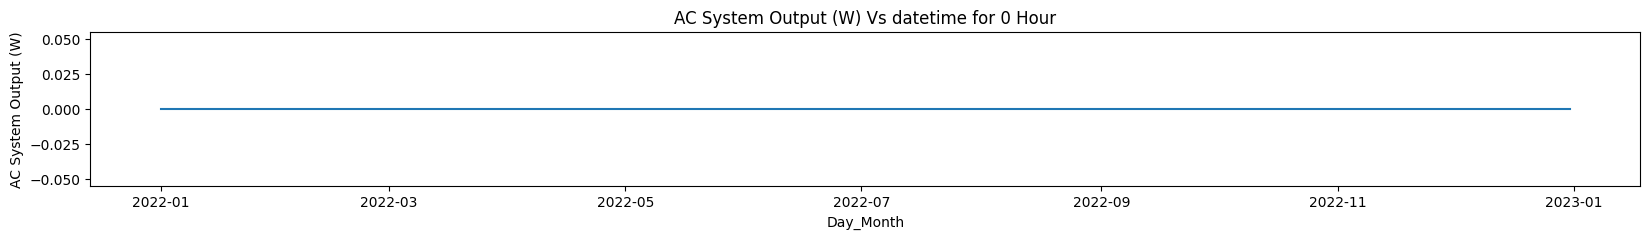

<Figure size 640x480 with 0 Axes>

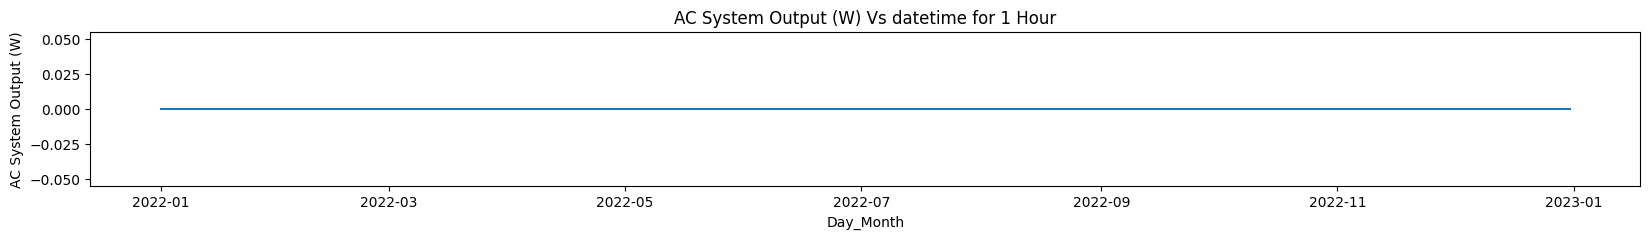

<Figure size 640x480 with 0 Axes>

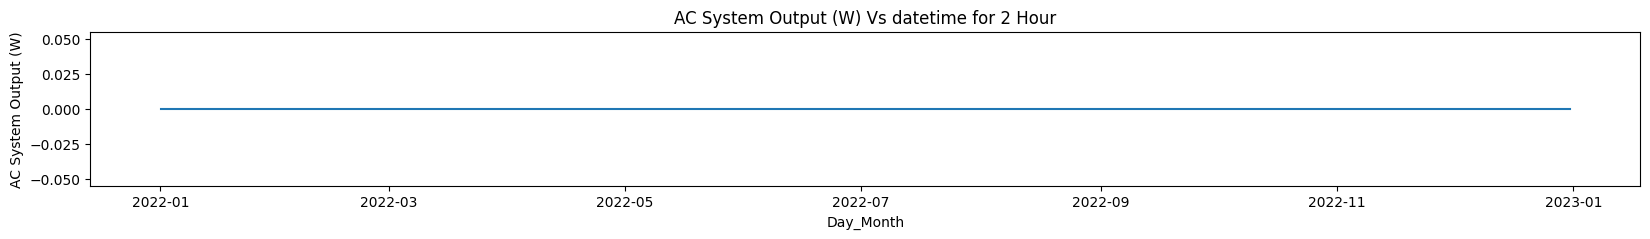

<Figure size 640x480 with 0 Axes>

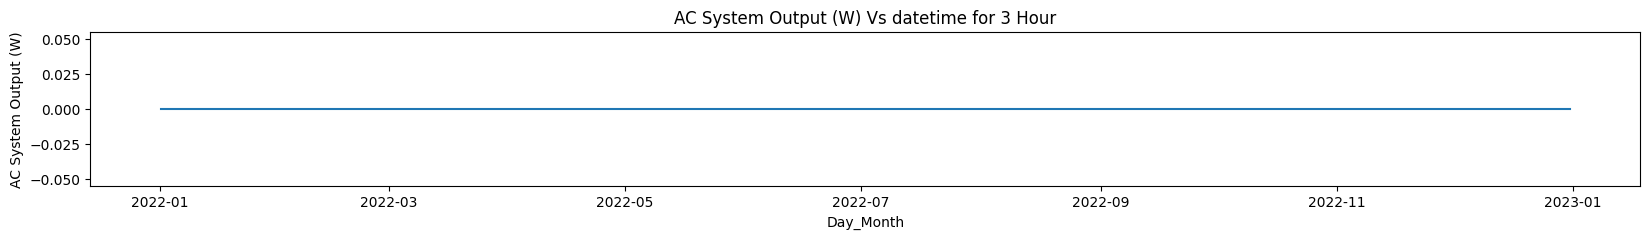

<Figure size 640x480 with 0 Axes>

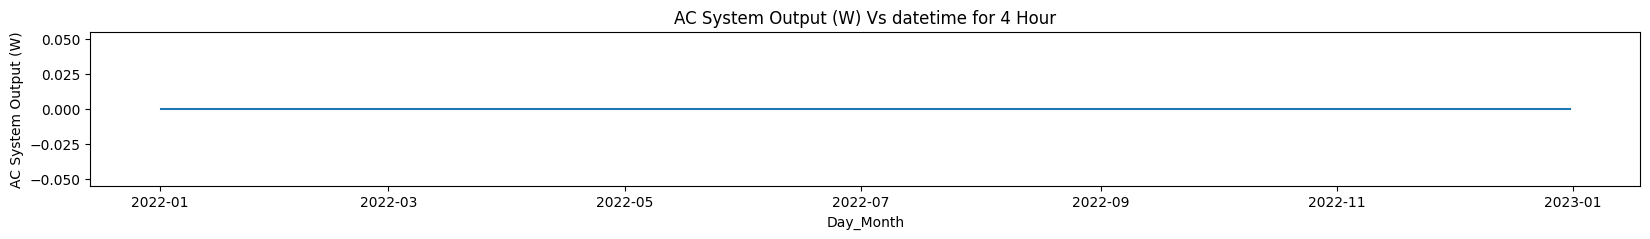

<Figure size 640x480 with 0 Axes>

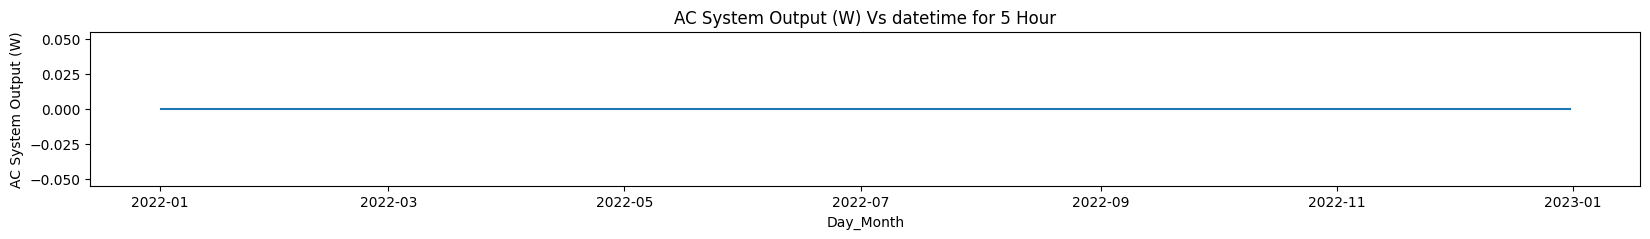

<Figure size 640x480 with 0 Axes>

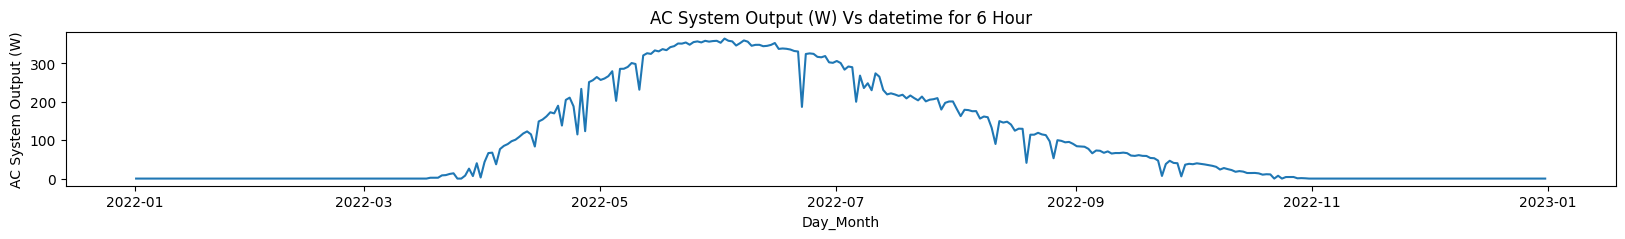

<Figure size 640x480 with 0 Axes>

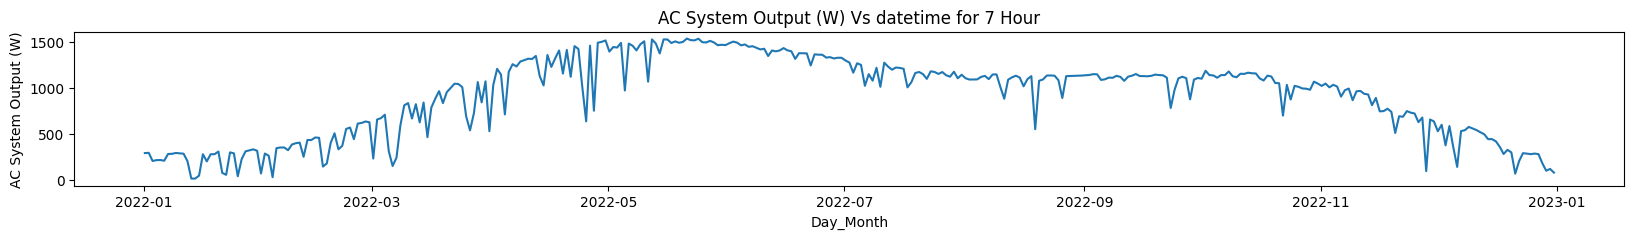

<Figure size 640x480 with 0 Axes>

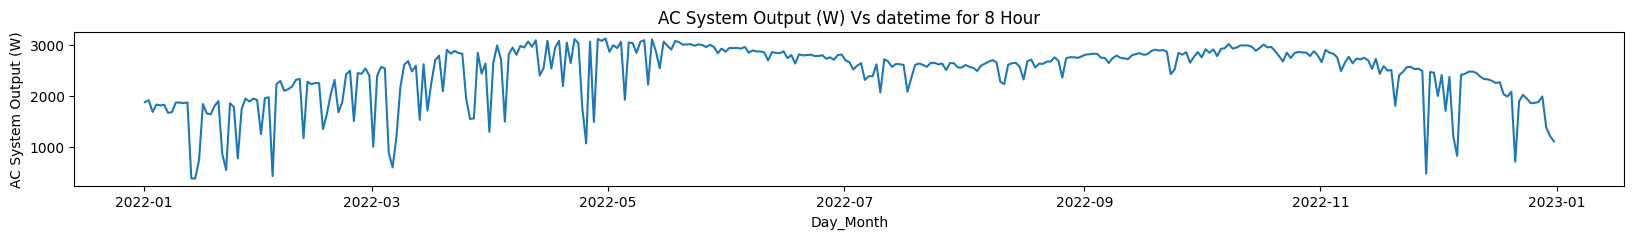

<Figure size 640x480 with 0 Axes>

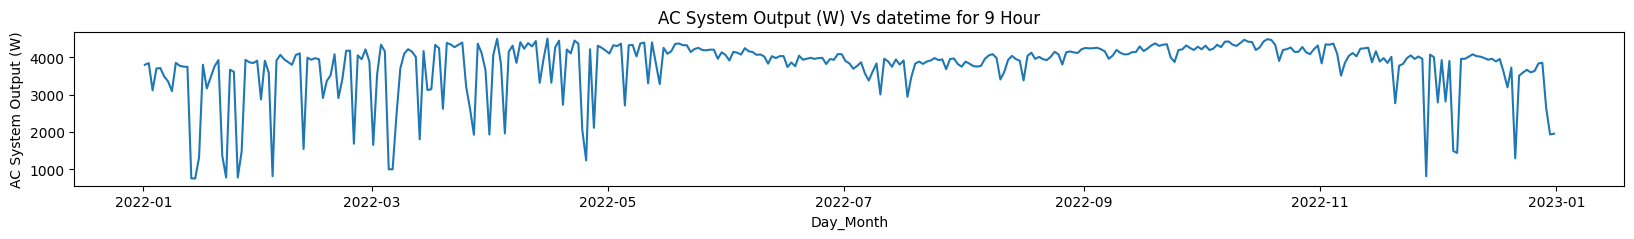

<Figure size 640x480 with 0 Axes>

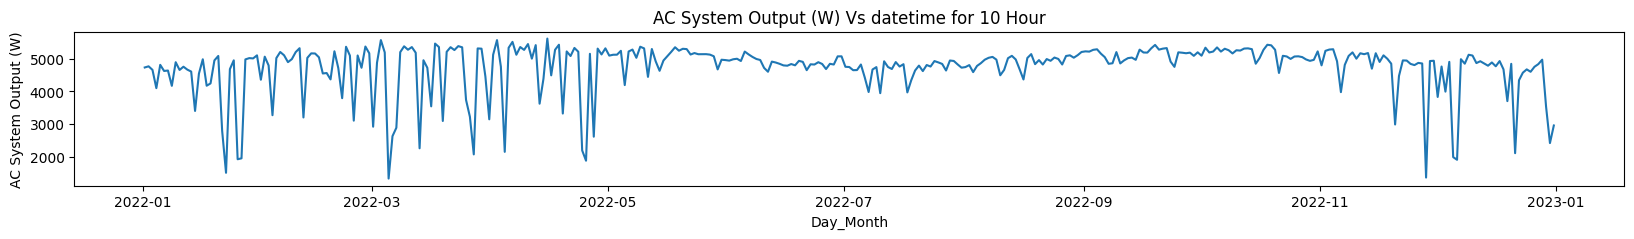

<Figure size 640x480 with 0 Axes>

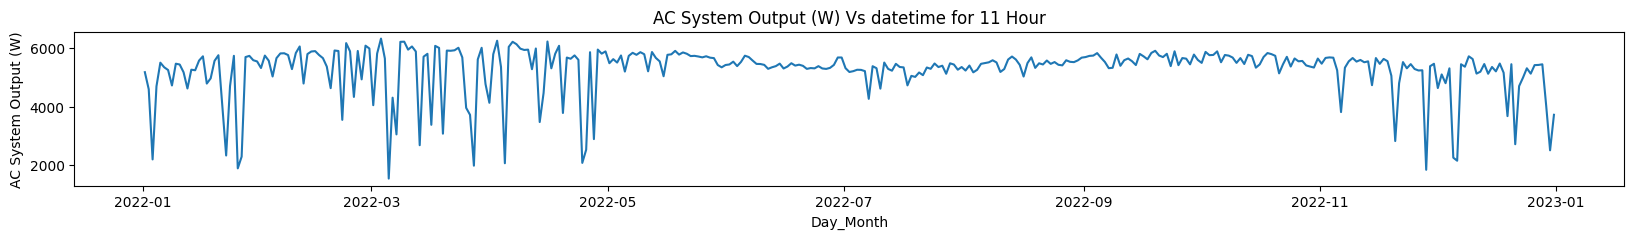

<Figure size 640x480 with 0 Axes>

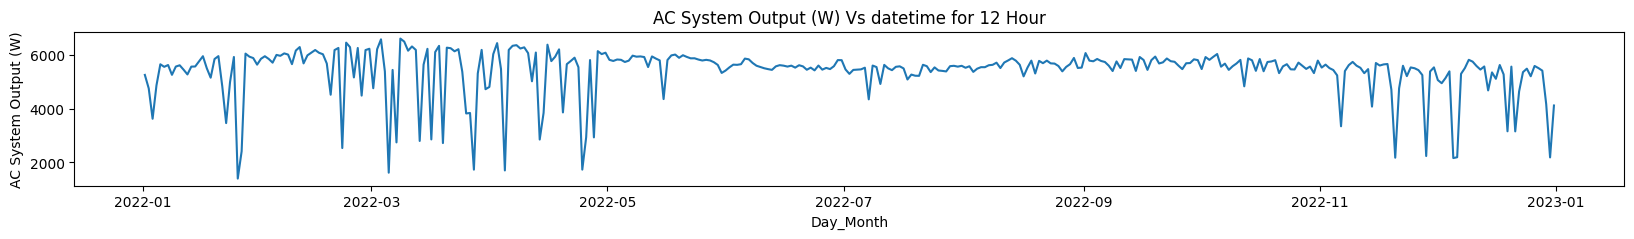

<Figure size 640x480 with 0 Axes>

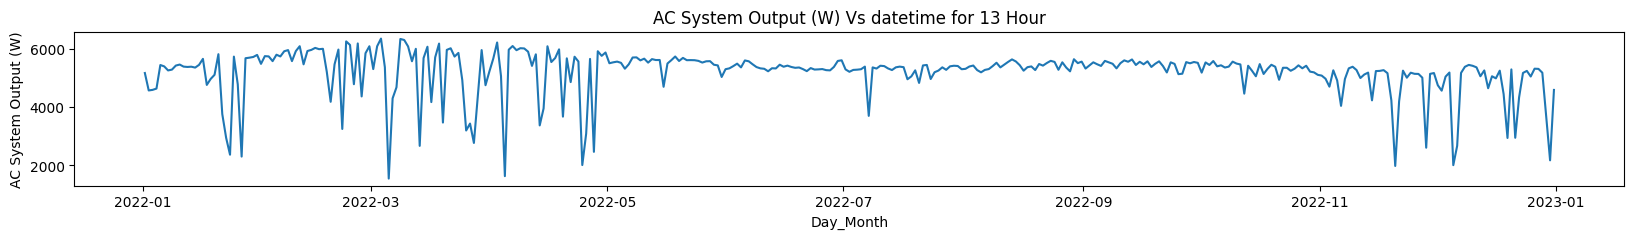

<Figure size 640x480 with 0 Axes>

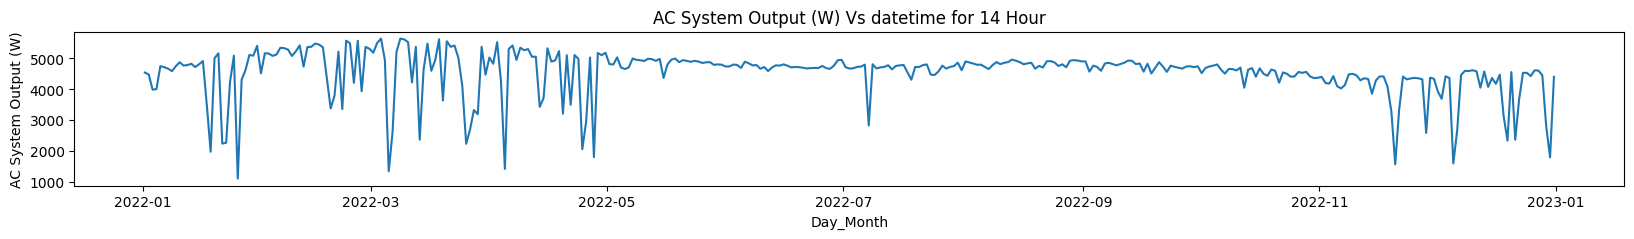

<Figure size 640x480 with 0 Axes>

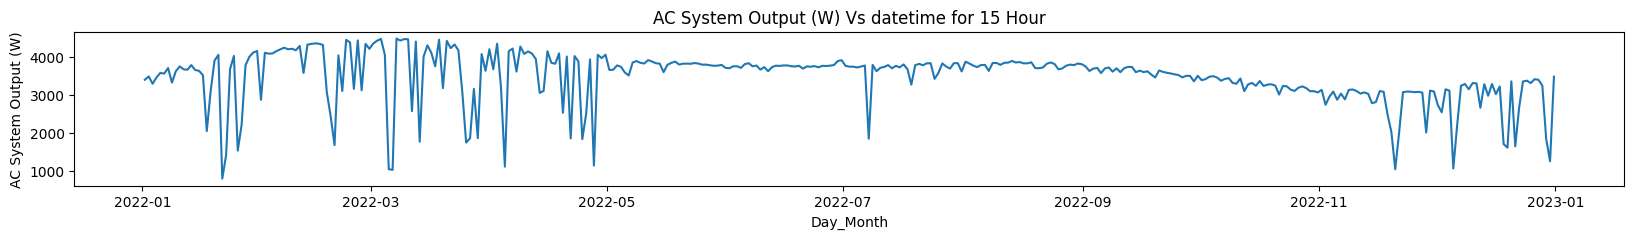

<Figure size 640x480 with 0 Axes>

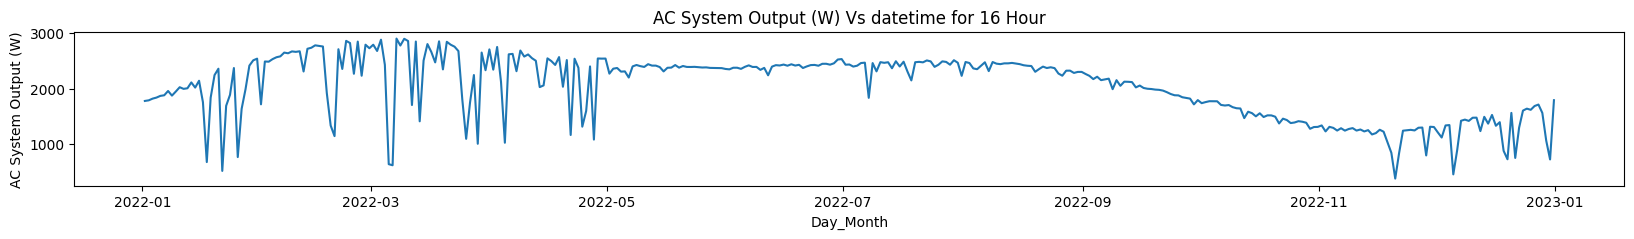

<Figure size 640x480 with 0 Axes>

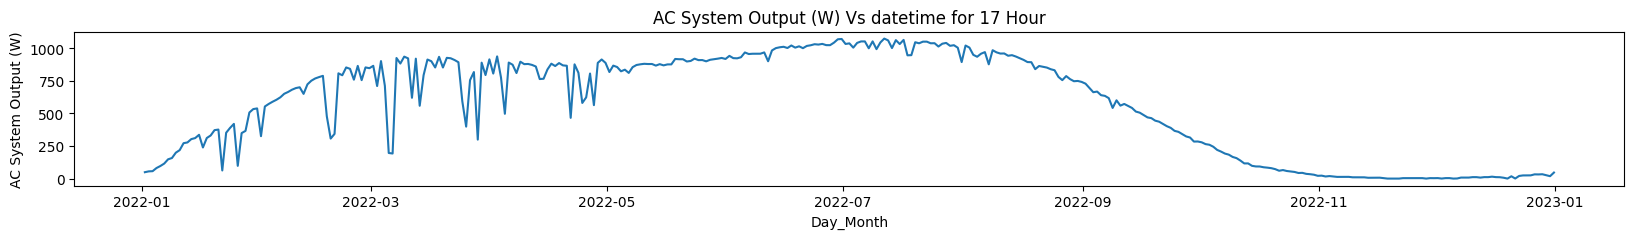

<Figure size 640x480 with 0 Axes>

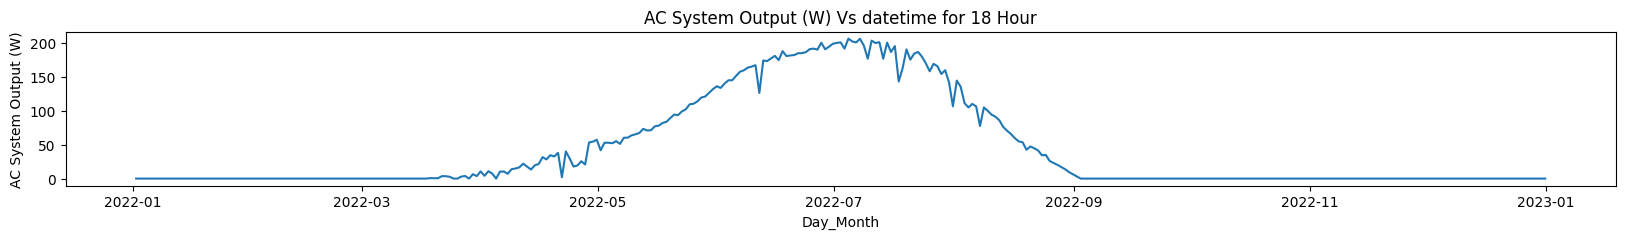

<Figure size 640x480 with 0 Axes>

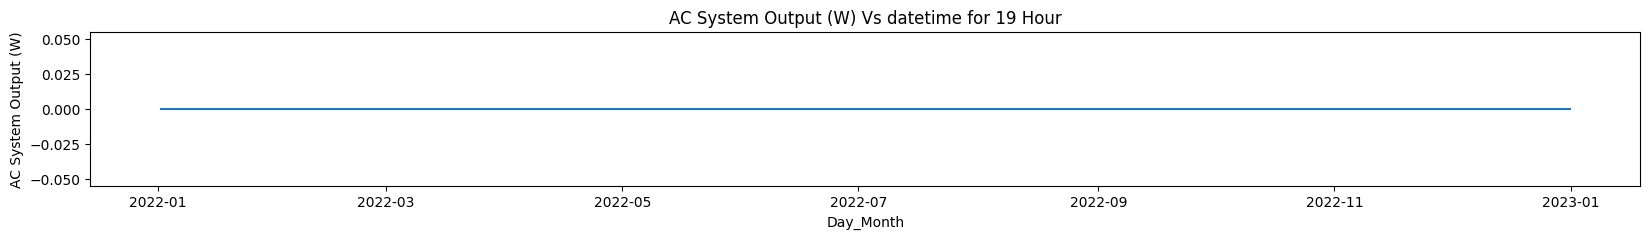

<Figure size 640x480 with 0 Axes>

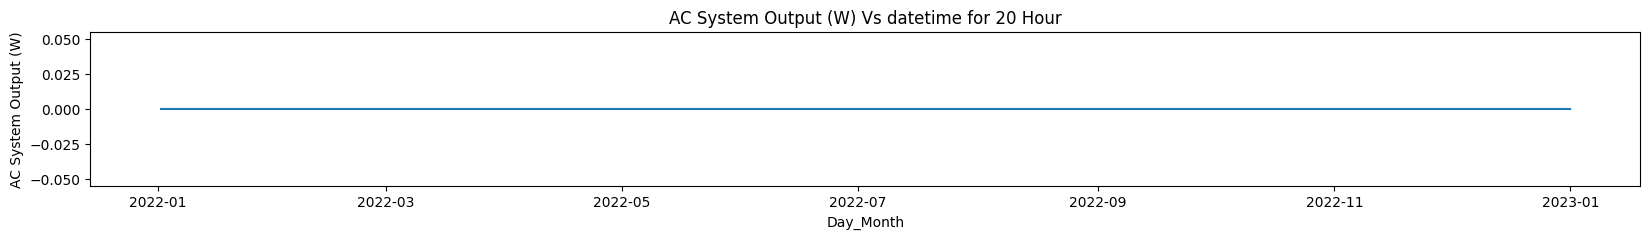

<Figure size 640x480 with 0 Axes>

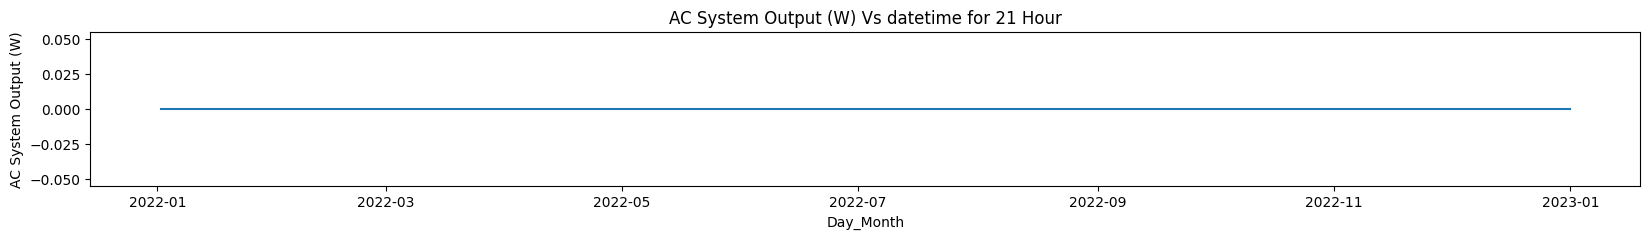

<Figure size 640x480 with 0 Axes>

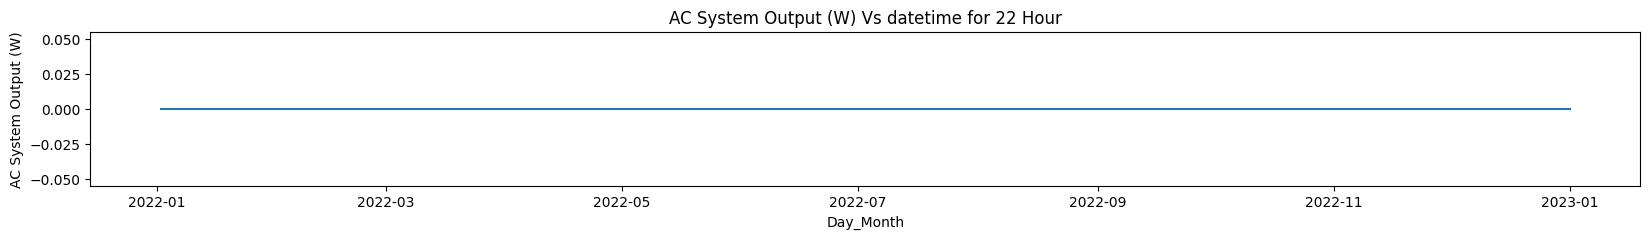

<Figure size 640x480 with 0 Axes>

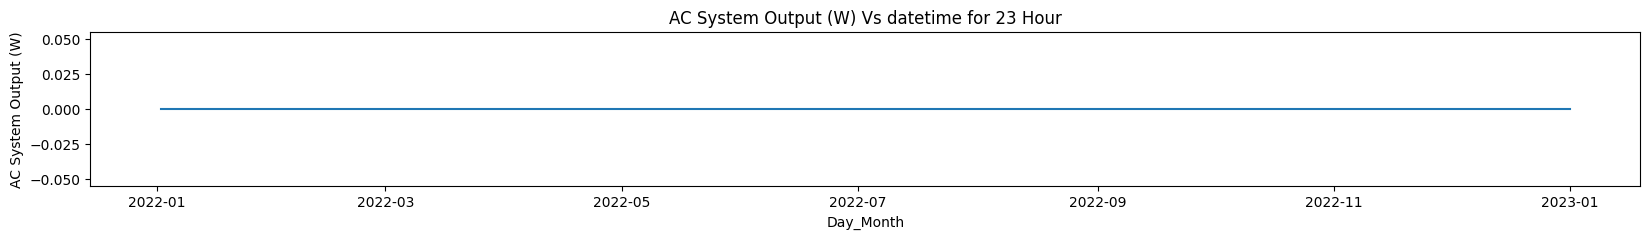

In [23]:
for hr, df_hr in enumerate(df.groupby('Hour')):
    plt.figure()
    fig = plt.figure(figsize=(20, 2))
    plt.plot(df_hr[1]['datetime'], df_hr[1]['AC System Output (W)'])
    plt.xlabel('Day_Month')
    plt.ylabel("AC System Output (W)")
    plt.title("AC System Output (W) Vs datetime for "+ str(hr) + " Hour")
    plt.show()

## Working with one specific hour time series and for DC Array Output (W) as target
### Consider "12:00" hr timeseries

In [25]:
ts = df[df['Hour'] == 12]
ts.shape

(365, 14)

In [26]:
ts.head(4)

Month  Day  Hour  Beam Irradiance (W/m2)  Diffuse Irradiance (W/m2)  \
12      1    1    12                     843                        116   
36      1    2    12                     545                        241   
60      1    3    12                     228                        348   
84      1    4    12                     553                        240   

    Ambient Temperature (C)  Wind Speed (m/s)  Albedo  \
12                     24.8               1.0    0.27   
36                     23.0               3.6    0.27   
60                     24.3               6.2    0.27   
84                     23.2               6.2    0.27   

    Plane of Array Irradiance (kW/m2)  Cell Temperature (C)  \
12                            890.980                52.040   
36                            761.406                37.005   
60                            574.225                31.842   
84                            768.246                33.311   

    DC Array Output (W)  AC System Output (W)  year            datetime  
12             5489.937              5263.698  2022 2022-01-01 12:00:00  
36             4967.884              4760.144  2022 2022-01-02 12:00:00  
60             3791.327              3625.277  2022 2022-01-03 12:00:00  
84             5085.171              4873.274  2022 2022-01-04 12:00:00

<Figure size 56000x400 with 0 Axes>

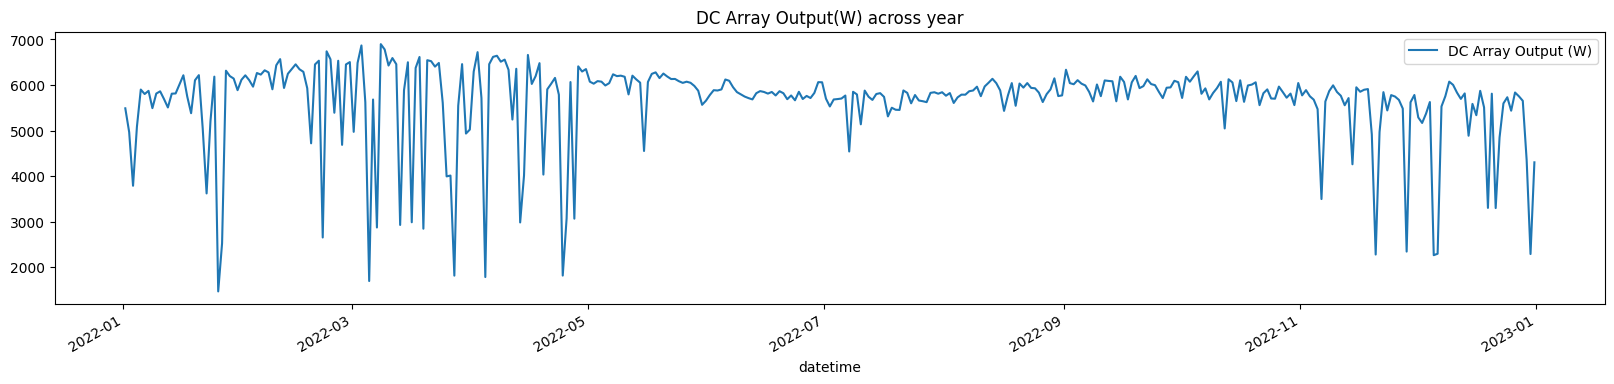

In [35]:
# Line Plot the DC output 
ts.plot(x = 'datetime', y = 'DC Array Output (W)', title = "DC Array Output(W) across year", figsize = (20,4))
plt.show()

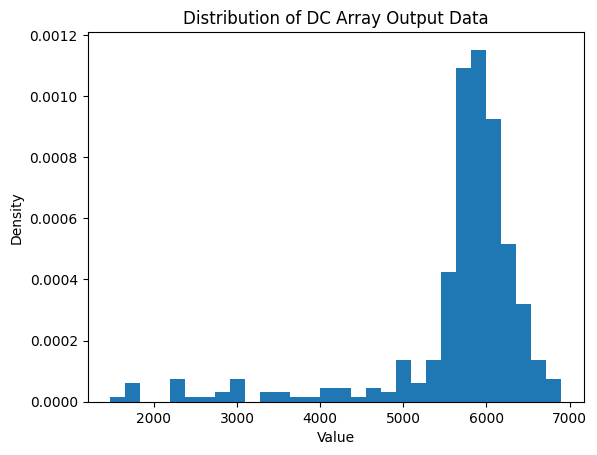

In [36]:
# Distribution plot 
# Plot a histogram of the data
plt.hist(ts['DC Array Output (W)'], bins=30, density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of DC Array Output Data')
plt.show()

In [40]:
fig = px.histogram(ts['DC Array Output (W)'], nbins=30, histnorm='density')

# Add labels and a title
fig.update_layout(xaxis_title='Value', yaxis_title='Density', title='Distribution of DC Array Output Data')

# Show the plot
fig.show()

In [43]:
hist_data = [ts['DC Array Output (W)']]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()